In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [3]:
from sklearn.tree import (DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)

# Fitting Regresion Trees

In [4]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept = False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [5]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, Boston['medv'],
                                                         test_size=0.3,
                                                         random_state=0)

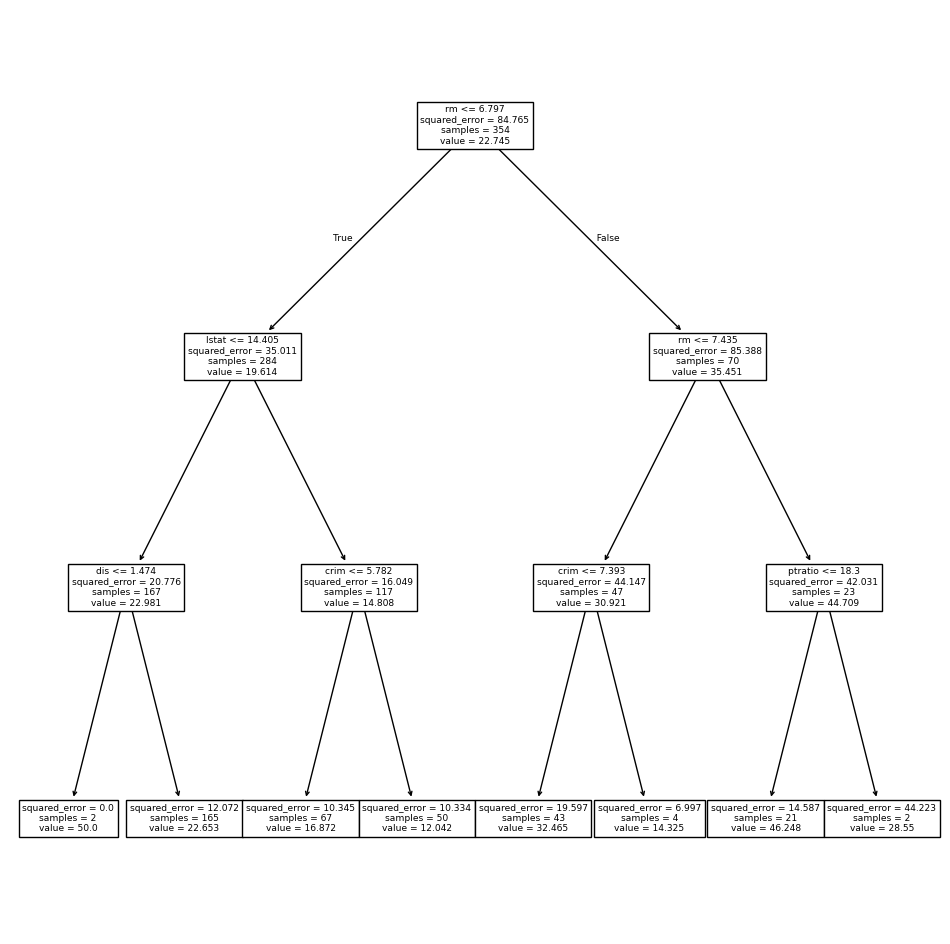

In [6]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots(figsize = (12,12))[1]
plot_tree(reg,
         feature_names = feature_names,
         ax = ax);

In [9]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                 shuffle = True,
                 random_state = 10)

In [10]:
grid = skm.GridSearchCV(reg,
                       {'ccp_alpha': ccp_path.ccp_alphas},
                       refit=True,
                       cv = kfold,
                       scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [13]:
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

28.06985754975404

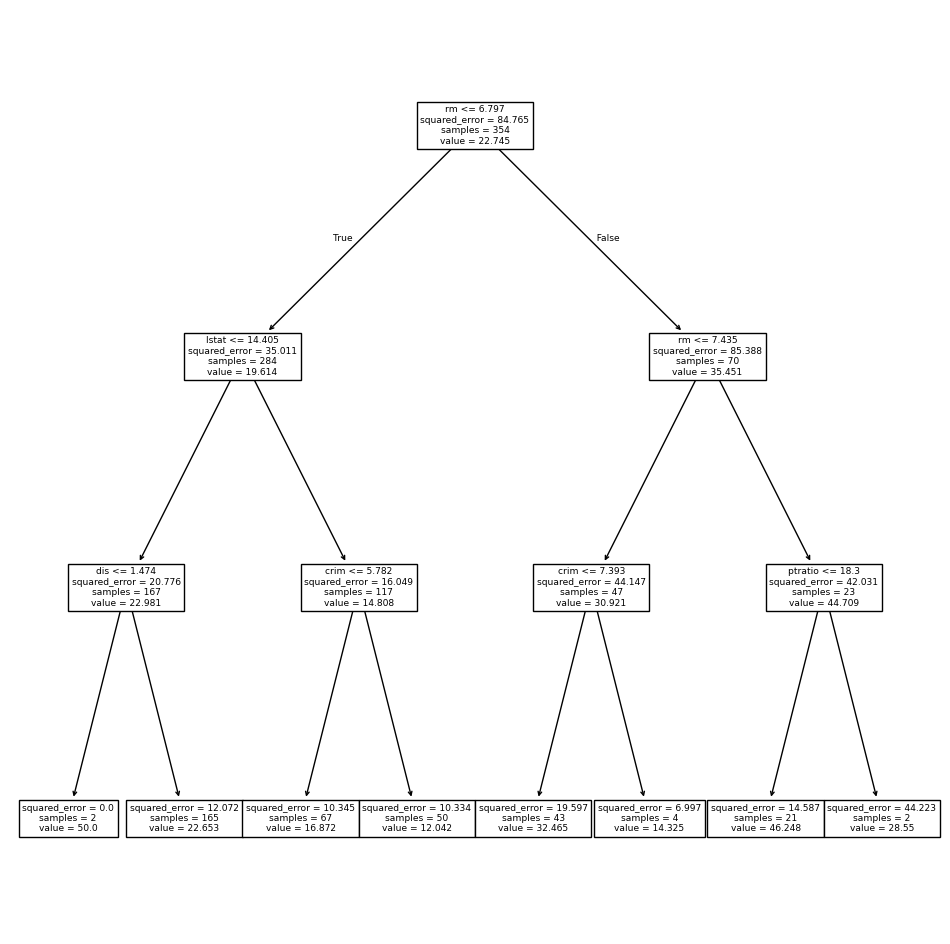

In [14]:
ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_,
         feature_names = feature_names,
         ax=ax);